## Deliverable 1 

### Project Topic

### The following data is actual marketing data from a Financial Institution on the ability to convert call-customers to purchase their financial product. It includes various things like whether the clients has a Housing loan, Personal loan, occupation and age.

### The main idea for this analysis is to train a ML model (XGBoost) in order to run coalition gametheory (SHAP) to gain the feature importance of the various feature values.

### This information would then serve to help both identify key factors that allow for better conversion rates and also to reduce efforts taken on low-impact areas.

### The data was sourced from a real-life private tech company that is not open to the public due to the sensitivity of the information.

### 1.0 EDA

In [1]:
import pandas as pd
import datetime

In [2]:
df=pd.read_csv('DataSampleA.csv',index_col=0)

In [3]:
df

,Job,Marital Status,Education,"Credit_default? (yes=1,no=0)",Average_yearly_balance,"Housing_loan(yes=1,no=0)","Personal_loan(yes=1,no=0)",Contact,Day,Month,ContactDuration(seconds),Number_of_contacts_this_campaign,Days_passed_from_previous_campaign,Number_of_contacts_before_this,Outcome_Previous_marketing,"y(yes=1,no=0)"
Age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0
35,management,single,tertiary,0,747,0,0,cellular,23,2,141,2,176,3,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,entrepreneur,married,unknown,0,1956,0,0,cellular,19,11,221,5,-1,0,unknown,0
37,blue-collar,divorced,secondary,0,0,1,0,cellular,21,4,146,4,-1,0,unknown,1
34,management,married,secondary,0,-294,1,0,unknown,27,5,532,2,-1,0,unknown,0


In [4]:
df.columns

Index(['Job', 'Marital Status', 'Education', 'Credit_default? (yes=1,no=0)',
       'Average_yearly_balance', 'Housing_loan(yes=1,no=0)',
       'Personal_loan(yes=1,no=0)', 'Contact', 'Day', 'Month',
       'ContactDuration(seconds)', 'Number_of_contacts_this_campaign',
       'Days_passed_from_previous_campaign', 'Number_of_contacts_before_this',
       'Outcome_Previous_marketing', 'y(yes=1,no=0)'],
      dtype='object')

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,Job,Marital Status,Education,"Credit_default? (yes=1,no=0)",Average_yearly_balance,"Housing_loan(yes=1,no=0)","Personal_loan(yes=1,no=0)",Contact,Day,Month,ContactDuration(seconds),Number_of_contacts_this_campaign,Days_passed_from_previous_campaign,Number_of_contacts_before_this,Outcome_Previous_marketing,"y(yes=1,no=0)"
Age,,,,,,,,,,,,,,,,
30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0
35,management,single,tertiary,0,747,0,0,cellular,23,2,141,2,176,3,failure,0


### Statistical counts of rows, columns and other information

In [6]:
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,"Credit_default? (yes=1,no=0)",Average_yearly_balance,"Housing_loan(yes=1,no=0)","Personal_loan(yes=1,no=0)",Day,Month,ContactDuration(seconds),Number_of_contacts_this_campaign,Days_passed_from_previous_campaign,Number_of_contacts_before_this,"y(yes=1,no=0)"
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,0.017276,1414.931647,0.565849,0.153480,15.912619,6.179269,261.953681,2.781422,39.415123,0.540310,0.114672
std,0.130314,3016.066443,0.495707,0.360495,8.202369,2.382823,258.893158,3.085077,99.585572,1.651901,0.318666
min,0.000000,-2082.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,69.000000,0.000000,0.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,0.000000,445.500000,1.000000,0.000000,16.000000,6.000000,184.000000,2.000000,-1.000000,0.000000,0.000000
75%,0.000000,1468.500000,1.000000,0.000000,21.000000,8.000000,325.750000,3.000000,-1.000000,0.000000,0.000000
max,1.000000,71188.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,24.000000,1.000000


### Check for missing data to determine if Data Cleaning is needed

In [7]:
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


Job                                   0
Marital Status                        0
Education                             0
Credit_default? (yes=1,no=0)          0
Average_yearly_balance                0
Housing_loan(yes=1,no=0)              0
Personal_loan(yes=1,no=0)             0
Contact                               0
Day                                   0
Month                                 0
ContactDuration(seconds)              0
Number_of_contacts_this_campaign      0
Days_passed_from_previous_campaign    0
Number_of_contacts_before_this        0
Outcome_Previous_marketing            0
y(yes=1,no=0)                         0
dtype: int64

<Figure size 1600x800 with 0 Axes>

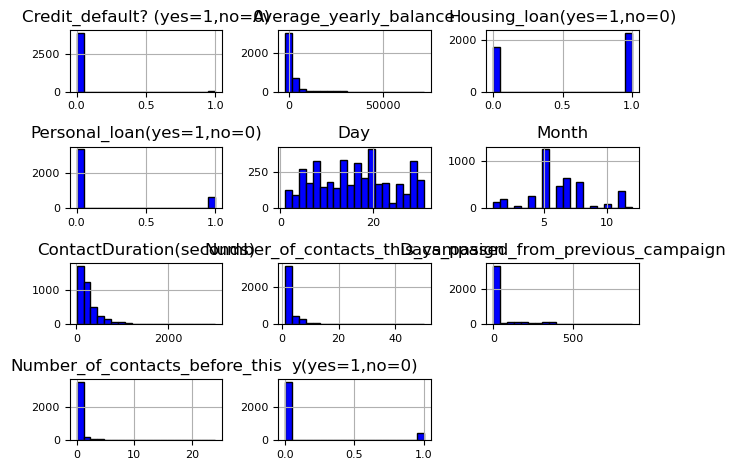

In [17]:
import matplotlib.pyplot as plt

# Visualize distribution of numerical features using histograms
plt.figure(figsize=(16, 8))
df.hist(bins=20, color='blue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.title('Distribution of Numerical Features', fontsize=12, fontweight='light')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21164\1913144417.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


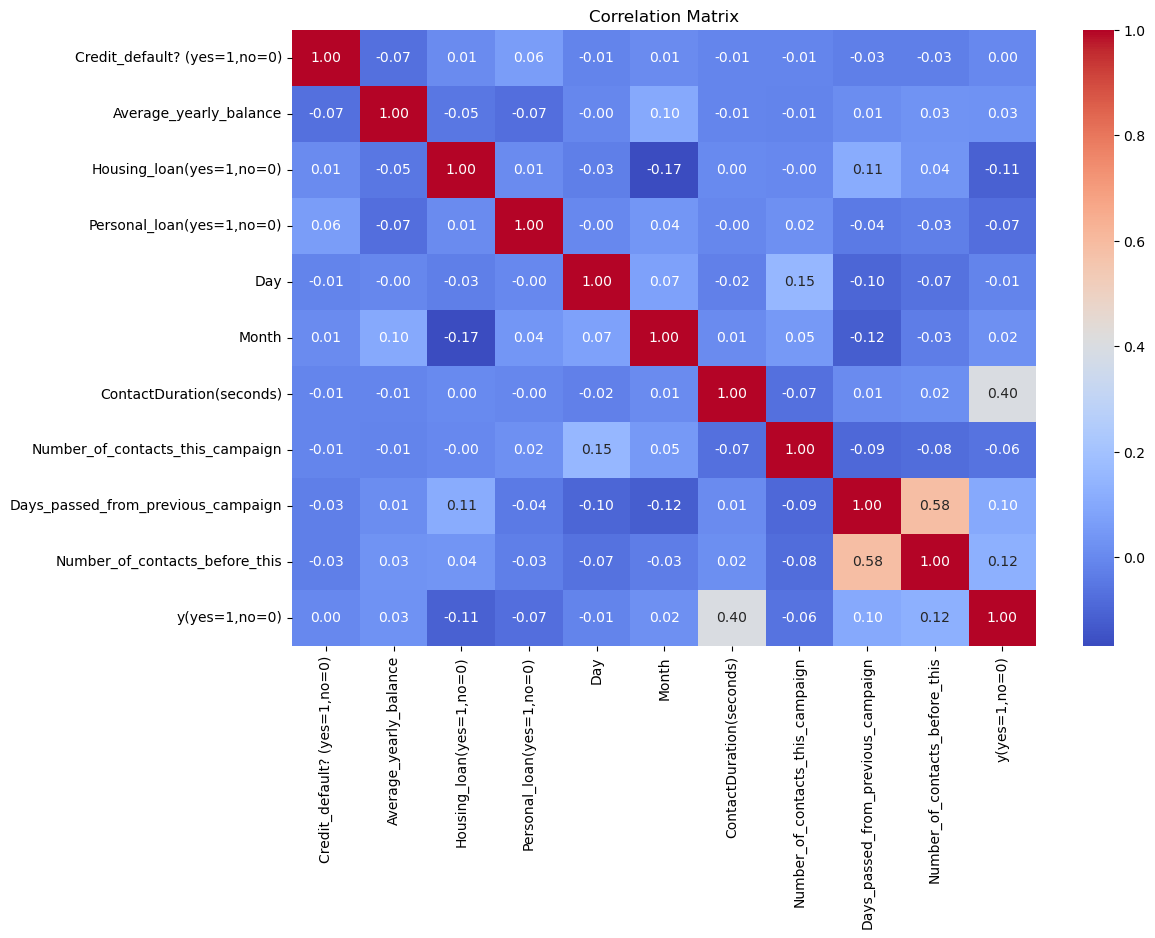

In [9]:
import seaborn as sns
# Visualize correlation between numerical features using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


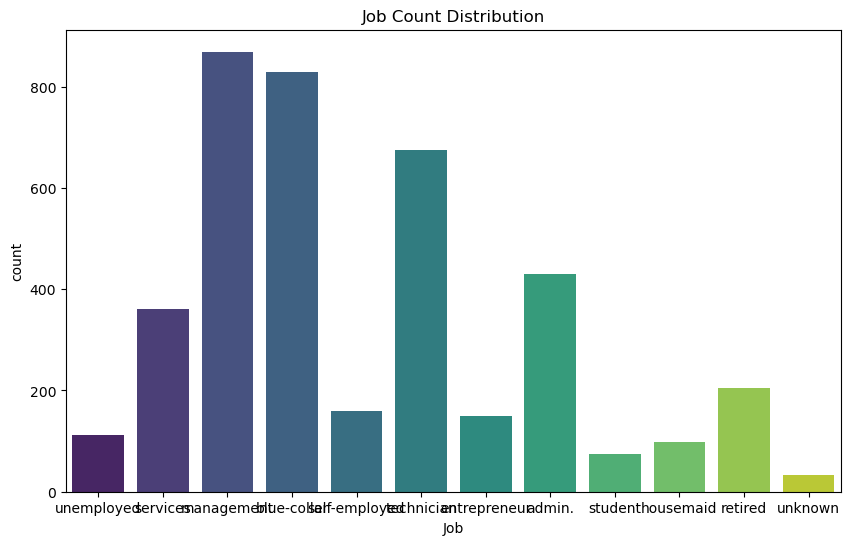

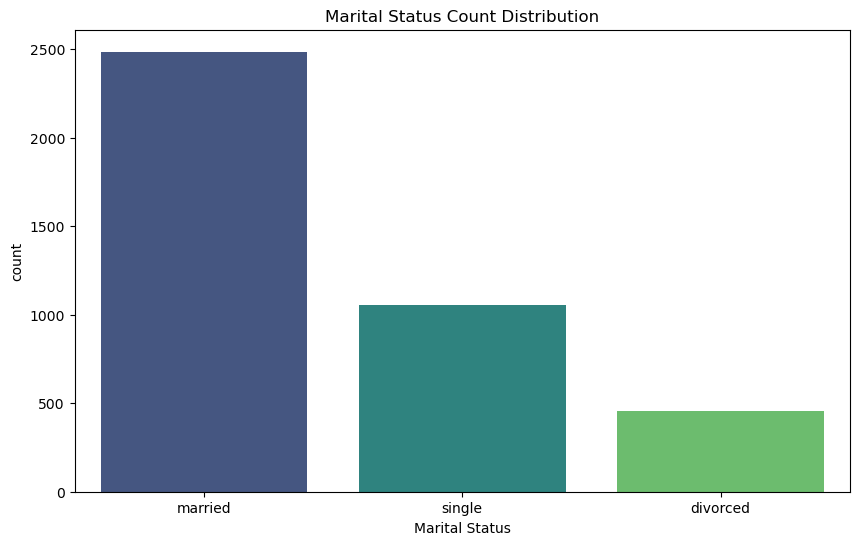

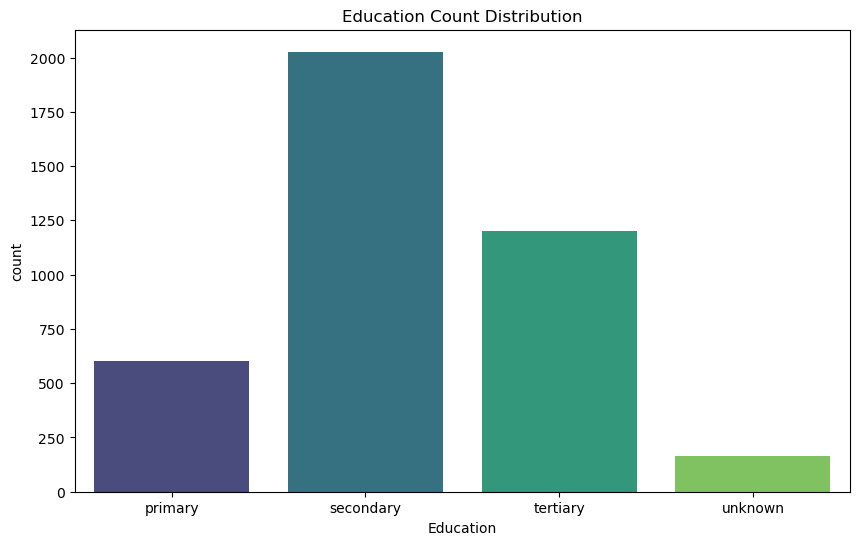

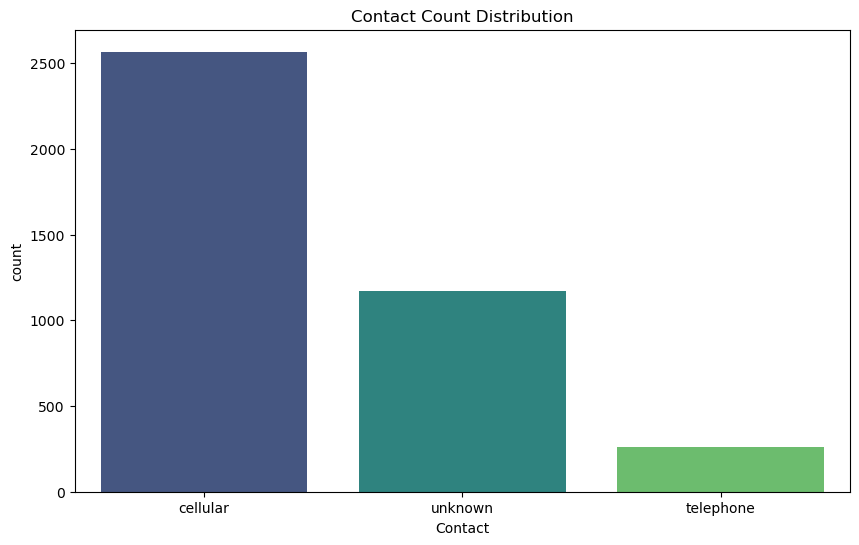

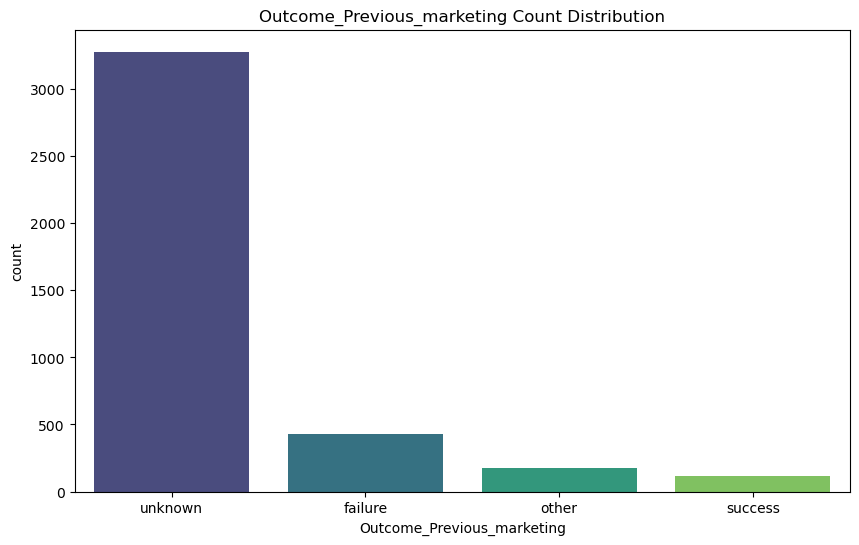

In [10]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f"{feature} Count Distribution")
    plt.show()


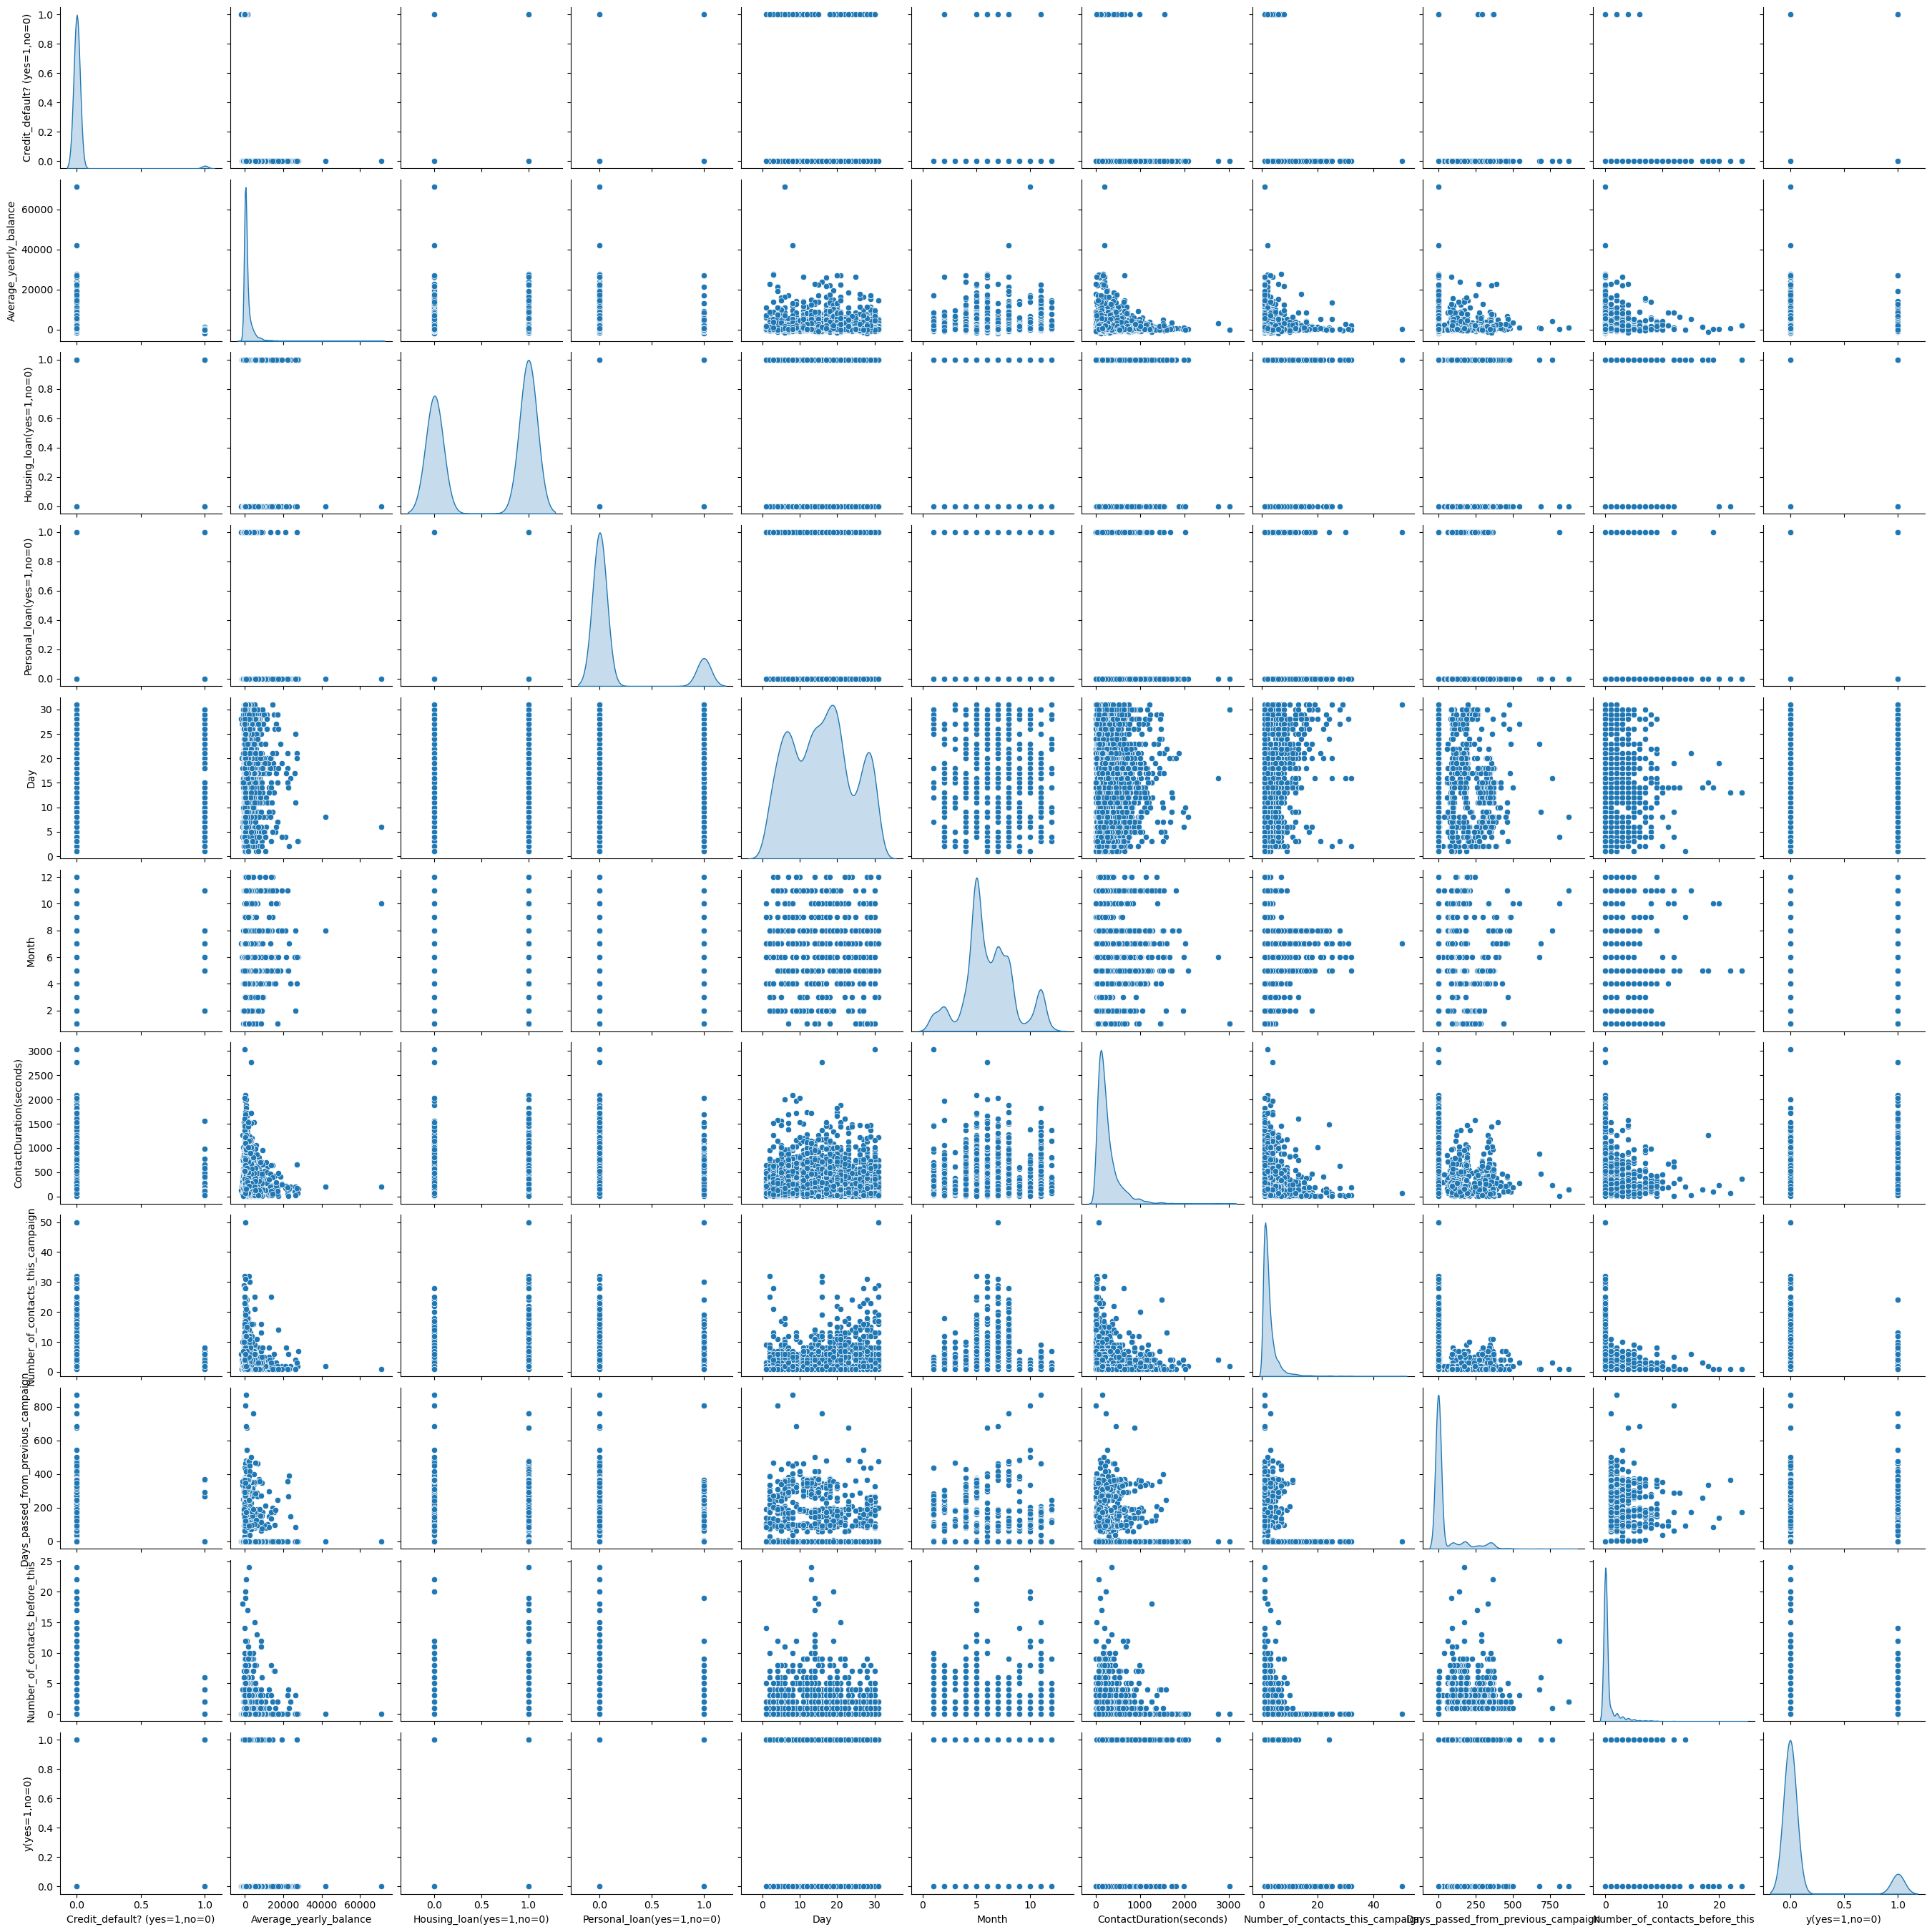

In [11]:
# Pairplot for overall visualization
sns.pairplot(df, diag_kind='kde')
plt.show()


#### It appears that the dataset is largely uncorrelated with one another based off the correlation heat matrix. This would be good in that the Regression model will not be affected by biasness.


### 2.0 Model Training & Data Cleaning

### 2.1 The categorical columns will need to be one-hot encoded in order to perform proper analysis

In [5]:
#Categorical Columns
categorical_columns=['Job', 'Marital Status', 'Education', 'Contact',
       'Outcome_Previous_marketing']

In [6]:
categorical_columns

['Job', 'Marital Status', 'Education', 'Contact', 'Outcome_Previous_marketing']

In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [8]:
df_encoded

,"Credit_default? (yes=1,no=0)",Average_yearly_balance,"Housing_loan(yes=1,no=0)","Personal_loan(yes=1,no=0)",Day,Month,ContactDuration(seconds),Number_of_contacts_this_campaign,Days_passed_from_previous_campaign,Number_of_contacts_before_this,...,Education_secondary,Education_tertiary,Education_unknown,Contact_cellular,Contact_telephone,Contact_unknown,Outcome_Previous_marketing_failure,Outcome_Previous_marketing_other,Outcome_Previous_marketing_success,Outcome_Previous_marketing_unknown
Age,,,,,,,,,,,,,,,,,,,,,
30,0,1787,0,0,19,10,79,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
33,0,4789,1,1,11,5,220,1,339,4,...,1,0,0,1,0,0,1,0,0,0
35,0,1350,1,0,16,4,185,1,330,1,...,0,1,0,1,0,0,1,0,0,0
59,0,0,1,0,5,5,226,1,-1,0,...,1,0,0,0,0,1,0,0,0,1
35,0,747,0,0,23,2,141,2,176,3,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0,1956,0,0,19,11,221,5,-1,0,...,0,0,1,1,0,0,0,0,0,1
37,0,0,1,0,21,4,146,4,-1,0,...,1,0,0,1,0,0,0,0,0,1
34,0,-294,1,0,27,5,532,2,-1,0,...,1,0,0,0,0,1,0,0,0,1


In [9]:
# Get the column names in the current order
columns = df_encoded.columns.tolist()

In [10]:
columns

['Credit_default? (yes=1,no=0)',
 'Average_yearly_balance',
 'Housing_loan(yes=1,no=0)',
 'Personal_loan(yes=1,no=0)',
 'Day',
 'Month',
 'ContactDuration(seconds)',
 'Number_of_contacts_this_campaign',
 'Days_passed_from_previous_campaign',
 'Number_of_contacts_before_this',
 'y(yes=1,no=0)',
 'Job_admin.',
 'Job_blue-collar',
 'Job_entrepreneur',
 'Job_housemaid',
 'Job_management',
 'Job_retired',
 'Job_self-employed',
 'Job_services',
 'Job_student',
 'Job_technician',
 'Job_unemployed',
 'Job_unknown',
 'Marital Status_divorced',
 'Marital Status_married',
 'Marital Status_single',
 'Education_primary',
 'Education_secondary',
 'Education_tertiary',
 'Education_unknown',
 'Contact_cellular',
 'Contact_telephone',
 'Contact_unknown',
 'Outcome_Previous_marketing_failure',
 'Outcome_Previous_marketing_other',
 'Outcome_Previous_marketing_success',
 'Outcome_Previous_marketing_unknown']

### 2.2 Shift Target Feature to right side

In [11]:
#Supervised
# Get the column names in the current order
columns = df_encoded.columns.tolist()
columns.remove("y(yes=1,no=0)")
columns.append("y(yes=1,no=0)")
# Reorder the columns in the DataFrame
df_encoded = df_encoded[columns]

df_encoded.to_excel('df_encoded.xlsx')


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_encoded.columns

Index(['Credit_default? (yes=1,no=0)', 'Average_yearly_balance',
       'Housing_loan(yes=1,no=0)', 'Personal_loan(yes=1,no=0)', 'Day', 'Month',
       'ContactDuration(seconds)', 'Number_of_contacts_this_campaign',
       'Days_passed_from_previous_campaign', 'Number_of_contacts_before_this',
       'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown',
       'Marital Status_divorced', 'Marital Status_married',
       'Marital Status_single', 'Education_primary', 'Education_secondary',
       'Education_tertiary', 'Education_unknown', 'Contact_cellular',
       'Contact_telephone', 'Contact_unknown',
       'Outcome_Previous_marketing_failure',
       'Outcome_Previous_marketing_other',
       'Outcome_Previous_marketing_success',
       'Outcome_Previous_marketing_unknown', 'y(yes=1,no=0)'],
      dtype='object')

### 2.3 Split via Train-Test-Split using Scikit Learn

#### The current training size will be 75% with 25% being the test data set

In [14]:
df_merged=pd.read_excel('df_encoded.xlsx')
X_train, X_test, y_train, y_test = train_test_split(
    df_merged[df_merged.columns[:-1]], df_merged["y(yes=1,no=0)"], test_size=0.25
)

### 3.0 Model Training, Metrics and Coalition Game Theory

XGBoost Documentation

XGBoost (Extreme Gradient Boosting) is an efficient and scalable machine learning library designed for supervised learning tasks, especially for gradient boosting. Developed by Tianqi Chen, XGBoost has gained widespread popularity for its high performance, flexibility, and accuracy in various machine learning competitions.

This model was chosen due to it's sheer ability to generalize well and also be able to accomodate the dataset without needing to perform normalisation.

In [15]:
import xgboost
import optuna
import numpy as np
from sklearn.metrics import mean_squared_error

C:\Users\Admin\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Define the model
model = xgboost.XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.0721806839634713
RMSE:  0.2686646310243894


### 3.1 Use Optuna for Training

The following function, objective(trial), is designed for use within the Optuna framework to perform hyperparameter optimization for an XGBoost regression model. The goal is to find the optimal combination of hyperparameters that minimizes the mean squared error on a given dataset.

In [17]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

Create an Optuna study and optimize the objective function by suggesting hyperparameters iteratively.

In [18]:
# Create the study
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-12-18 20:20:28,451] A new study created in memory with name: regression
[I 2023-12-18 20:20:29,162] Trial 0 finished with value: 0.1353247038015803 and parameters: {'max_depth': 7, 'learning_rate': 0.9421526336600432, 'n_estimators': 540, 'min_child_weight': 5, 'gamma': 0.3053138829517941, 'subsample': 0.6243630812168212, 'colsample_bytree': 0.9805614892562085, 'reg_alpha': 0.1448961907243597, 'reg_lambda': 0.8875978468228165, 'random_state': 519}. Best is trial 0 with value: 0.1353247038015803.
[I 2023-12-18 20:20:29,769] Trial 1 finished with value: 0.0935836550492583 and parameters: {'max_depth': 4, 'learning_rate': 0.4137120150995892, 'n_estimators': 712, 'min_child_weight': 2, 'gamma': 0.6692368650019768, 'subsample': 0.40437603814317763, 'colsample_bytree': 0.9993215715883629, 'reg_alpha': 0.03766804343116321, 'reg_lambda': 0.1499292747286968, 'random_state': 58}. Best is trial 1 with value: 0.0935836550492583.
[I 2023-12-18 20:20:31,081] Trial 2 finished with value: 0.10

[I 2023-12-18 20:20:36,255] Trial 19 finished with value: 0.06626105183392848 and parameters: {'max_depth': 7, 'learning_rate': 0.13420965987359515, 'n_estimators': 389, 'min_child_weight': 7, 'gamma': 0.7572365422136925, 'subsample': 0.708495595468541, 'colsample_bytree': 0.42643085209579035, 'reg_alpha': 0.5681260830182685, 'reg_lambda': 0.14592039006300261, 'random_state': 182}. Best is trial 19 with value: 0.06626105183392848.
[I 2023-12-18 20:20:36,736] Trial 20 finished with value: 0.06862418509199687 and parameters: {'max_depth': 7, 'learning_rate': 0.14101495570242084, 'n_estimators': 399, 'min_child_weight': 6, 'gamma': 0.7381072038796161, 'subsample': 0.6412950888785676, 'colsample_bytree': 0.46948341330878496, 'reg_alpha': 0.5932687816255787, 'reg_lambda': 0.041371467612006, 'random_state': 179}. Best is trial 19 with value: 0.06626105183392848.
[I 2023-12-18 20:20:37,130] Trial 21 finished with value: 0.06955940571469962 and parameters: {'max_depth': 6, 'learning_rate': 0.1

[I 2023-12-18 20:20:44,977] Trial 38 finished with value: 0.06624322291754704 and parameters: {'max_depth': 10, 'learning_rate': 0.05129412286049348, 'n_estimators': 697, 'min_child_weight': 5, 'gamma': 0.699684261615617, 'subsample': 0.5359239288390919, 'colsample_bytree': 0.757631674174571, 'reg_alpha': 0.7106112268392211, 'reg_lambda': 0.24469396911678842, 'random_state': 595}. Best is trial 37 with value: 0.06573353874018907.
[I 2023-12-18 20:20:46,014] Trial 39 finished with value: 0.06556929310853288 and parameters: {'max_depth': 10, 'learning_rate': 0.01239941093466359, 'n_estimators': 741, 'min_child_weight': 5, 'gamma': 0.541355643497423, 'subsample': 0.5309982735377312, 'colsample_bytree': 0.7783735664552377, 'reg_alpha': 0.7183779807117, 'reg_lambda': 0.3270593888296309, 'random_state': 601}. Best is trial 39 with value: 0.06556929310853288.
[I 2023-12-18 20:20:47,179] Trial 40 finished with value: 0.06676240770818759 and parameters: {'max_depth': 10, 'learning_rate': 0.0601

[I 2023-12-18 20:21:09,071] Trial 57 finished with value: 0.07312230568168405 and parameters: {'max_depth': 10, 'learning_rate': 0.14939458625518787, 'n_estimators': 787, 'min_child_weight': 4, 'gamma': 0.38930120597768564, 'subsample': 0.39627257757788914, 'colsample_bytree': 0.9600434435342877, 'reg_alpha': 0.8343704025331663, 'reg_lambda': 0.2916827897379808, 'random_state': 949}. Best is trial 54 with value: 0.06475248640407708.
[I 2023-12-18 20:21:09,964] Trial 58 finished with value: 0.07850453601144901 and parameters: {'max_depth': 10, 'learning_rate': 0.2057489683119304, 'n_estimators': 588, 'min_child_weight': 2, 'gamma': 0.32481488227819266, 'subsample': 0.27272010025377535, 'colsample_bytree': 0.9171595449246521, 'reg_alpha': 0.7343988478326827, 'reg_lambda': 0.43425011849963213, 'random_state': 457}. Best is trial 54 with value: 0.06475248640407708.
[I 2023-12-18 20:21:10,992] Trial 59 finished with value: 0.0667018436177461 and parameters: {'max_depth': 9, 'learning_rate':

[I 2023-12-18 20:21:35,548] Trial 76 finished with value: 0.06974804997155634 and parameters: {'max_depth': 10, 'learning_rate': 0.12034766143685058, 'n_estimators': 841, 'min_child_weight': 2, 'gamma': 0.49279672569846156, 'subsample': 0.3352342897322606, 'colsample_bytree': 0.9031269636879455, 'reg_alpha': 0.7339544054328849, 'reg_lambda': 0.41679769487147944, 'random_state': 704}. Best is trial 64 with value: 0.06422334685243432.
[I 2023-12-18 20:21:37,257] Trial 77 finished with value: 0.06576920606614722 and parameters: {'max_depth': 10, 'learning_rate': 0.06993684608560354, 'n_estimators': 807, 'min_child_weight': 4, 'gamma': 0.36820751008942154, 'subsample': 0.4753362497720457, 'colsample_bytree': 0.8525754826780403, 'reg_alpha': 0.6388642020587508, 'reg_lambda': 0.46651498694539123, 'random_state': 569}. Best is trial 64 with value: 0.06422334685243432.
[I 2023-12-18 20:21:38,723] Trial 78 finished with value: 0.06522452058017907 and parameters: {'max_depth': 9, 'learning_rate'

[I 2023-12-18 20:22:02,011] Trial 95 finished with value: 0.06512450935216298 and parameters: {'max_depth': 10, 'learning_rate': 0.011920718675440556, 'n_estimators': 873, 'min_child_weight': 3, 'gamma': 0.412702519773867, 'subsample': 0.4147787963762483, 'colsample_bytree': 0.9303900794082208, 'reg_alpha': 0.7715520878785538, 'reg_lambda': 0.37220478822827674, 'random_state': 650}. Best is trial 64 with value: 0.06422334685243432.
[I 2023-12-18 20:22:03,246] Trial 96 finished with value: 0.06602024936733569 and parameters: {'max_depth': 9, 'learning_rate': 0.01078481568837397, 'n_estimators': 862, 'min_child_weight': 4, 'gamma': 0.42428000329909427, 'subsample': 0.4018229399107428, 'colsample_bytree': 0.9271911877045417, 'reg_alpha': 0.7784313756851882, 'reg_lambda': 0.38751284158157423, 'random_state': 606}. Best is trial 64 with value: 0.06422334685243432.
[I 2023-12-18 20:22:04,771] Trial 97 finished with value: 0.06846913865086644 and parameters: {'max_depth': 10, 'learning_rate':

In [19]:
# Print the best parameters
print('Best parameters', study.best_params)

Best parameters {'max_depth': 9, 'learning_rate': 0.03521420916541809, 'n_estimators': 933, 'min_child_weight': 4, 'gamma': 0.5058455553806399, 'subsample': 0.430353421381394, 'colsample_bytree': 0.8919113673470358, 'reg_alpha': 0.6333254439048798, 'reg_lambda': 0.4591012042319173, 'random_state': 708}


In [20]:
# Print the best value
print('Best value', study.best_value)

Best value 0.06422334685243432


In [21]:
# Print the best trial
print('Best trial', study.best_trial)

Best trial FrozenTrial(number=64, state=TrialState.COMPLETE, values=[0.06422334685243432], datetime_start=datetime.datetime(2023, 12, 18, 20, 21, 15, 172417), datetime_complete=datetime.datetime(2023, 12, 18, 20, 21, 16, 651129), params={'max_depth': 9, 'learning_rate': 0.03521420916541809, 'n_estimators': 933, 'min_child_weight': 4, 'gamma': 0.5058455553806399, 'subsample': 0.430353421381394, 'colsample_bytree': 0.8919113673470358, 'reg_alpha': 0.6333254439048798, 'reg_lambda': 0.4591012042319173, 'random_state': 708}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=50, step=1), 'min_child_weight': IntDistribution(high=10, log=False, low=1, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=Fa

### 3.2 Use Optimal Hyperparameters

Once the best trial and hyperparameters have been determined, all that is left is to re-train the model using these parameters before running our feature insights into the dataset

In [29]:
best_params={'max_depth': 9, 'learning_rate': 0.03521420916541809, 'n_estimators': 933, 'min_child_weight': 4, 'gamma': 0.5058455553806399, 'subsample': 0.430353421381394, 'colsample_bytree': 0.8919113673470358, 'reg_alpha': 0.6333254439048798, 'reg_lambda': 0.4591012042319173, 'random_state': 708}


#model = xgboost.XGBRegressor(**study.best_params)
model = xgboost.XGBRegressor(**best_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.06422334685243432
RMSE:  0.2534232563369714


### 3.3 SHAP (SHapley Additive exPlanations)

SHAP (SHapley Additive exPlanations) is a powerful library for explaining the output of machine learning models. It provides a unified measure of feature importance based on cooperative game theory, specifically Shapley values. SHAP values allocate the contribution of each feature to the prediction for a particular instance, allowing for a more interpretable understanding of model predictions.

In [30]:
import shap

In [31]:
explainer = shap.TreeExplainer(model)

In [32]:
shap_values = explainer.shap_values(X_test)


In [33]:
# visualize the first prediction's explanation


In [34]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


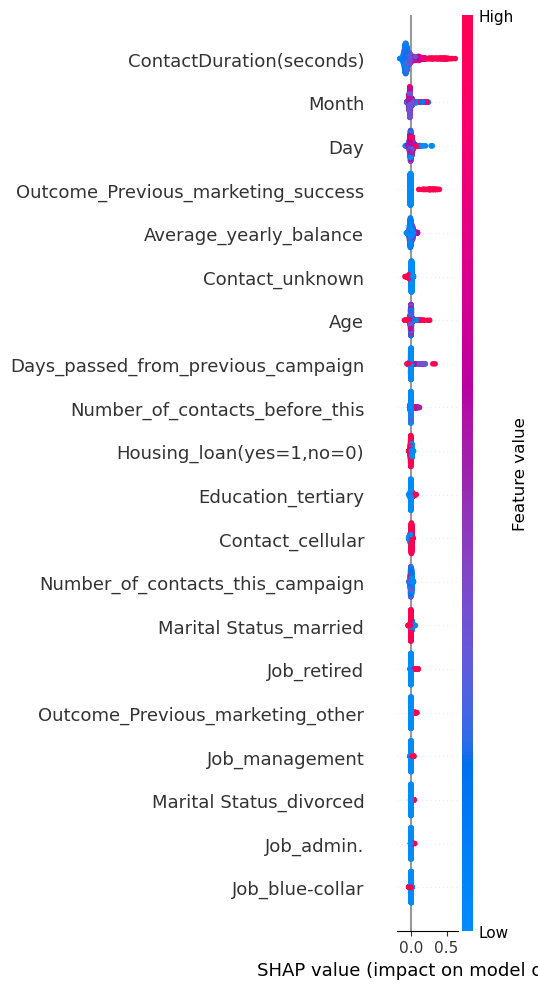

In [35]:
# Assuming you have already computed shap_values and have X_test
shap.summary_plot(shap_values, X_test,plot_size=(5,10) )

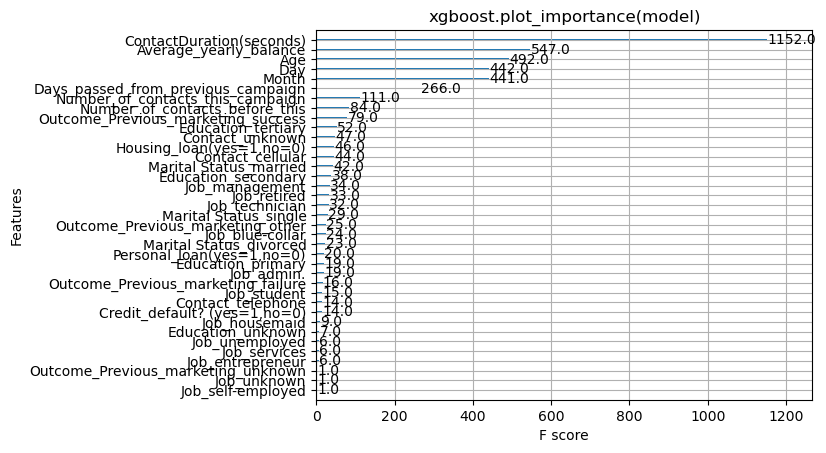

In [43]:
import matplotlib.pylab as pl
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()



In [65]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

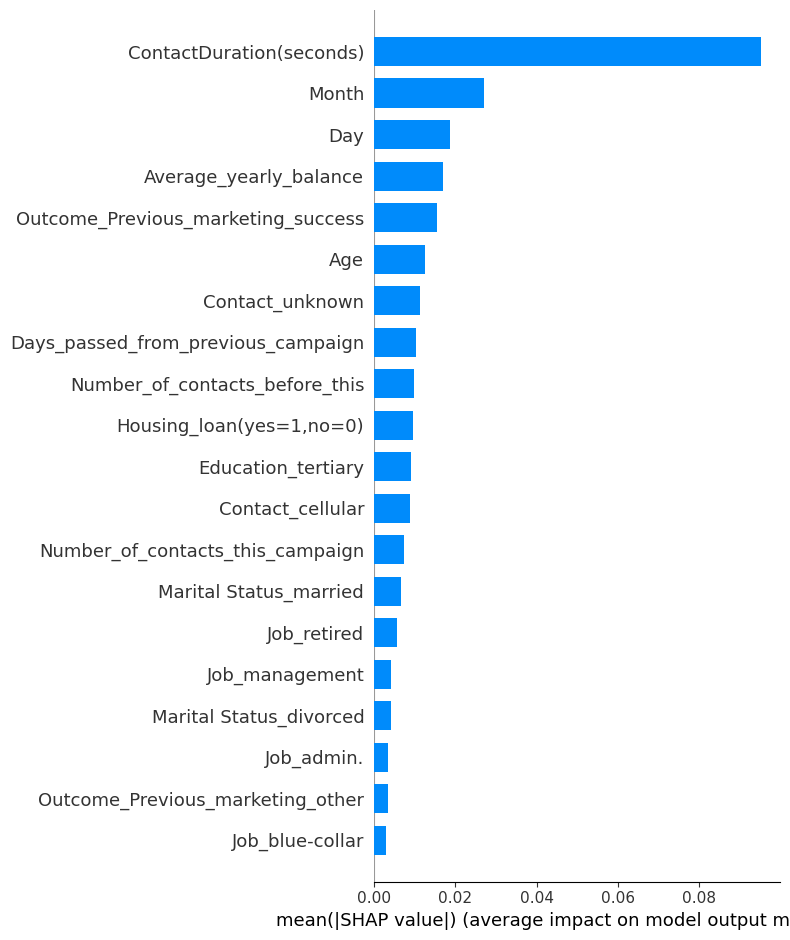

In [66]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

### 3.4 Saving SHAP Dependency Graphs

In [69]:
import os
import shap
import matplotlib.pyplot as plt

# Assuming you have already computed shap_values and have X_train DataFrame

# Set the path where you want to save the images (current directory)
save_path = '.'

output_directory = os.getcwd()
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train, show=False)
    
    sanitized_name = name.replace("?", "_")
    
    plt.savefig(os.path.join(output_directory, f'shap_dependence_plot_{sanitized_name}.png'))
    
    plt.close()



### 4.0 Conclusion

The conclusion of the model study is very insightful.

It goes to show that the main influence on the willingness of people to purchase is whether the call centre staff is able to maintain a longer duration of contact.

This can be further seen by the differing months, years and also the occupation playing an influence into the aspects of the results.

The dependency plots are too many for this notebook and the proper presentation will be shown in the .mp4 file.

Please refer to the power point slides as well for the full slide deck:

https://github.com/StrangeNPC/MarketingDataProject.git